In [1]:
from functions import *

## Objective:

Cluster the songs again but with the previous cluster labels along with other musical features

In [2]:
en_songs2 = pd.read_csv('data/en_songs2.csv')

## Other features

We will choose these features that will be clustered after NLP clustering since they are numerical metrics for musical elements :
 - danceability
 - energy
 - speechiness
 - acousticness
 - tempo
 - instrumentalness

In [3]:
X = en_songs2[['danceability', 'energy', 'speechiness', 'acousticness','tempo', 'instrumentalness', 'cluster_label']]

In [4]:
X

,danceability,energy,speechiness,acousticness,tempo,instrumentalness,cluster_label
0,0.303,0.880,0.0442,0.01170,135.225,0.009940,8
1,0.845,0.652,0.2160,0.00432,111.904,0.007230,14
2,0.425,0.378,0.0341,0.68900,118.593,0.000000,3
3,0.760,0.887,0.0409,0.03700,130.018,0.000000,12
4,0.496,0.639,0.0550,0.28000,147.764,0.000000,16
...,...,...,...,...,...,...,...
13718,0.425,0.504,0.0314,0.02200,165.818,0.000004,18
13719,0.744,0.715,0.3510,0.10100,154.962,0.000000,13
13720,0.479,0.800,0.0878,0.00555,128.012,0.000000,14
13721,0.458,0.540,0.0270,0.71500,142.218,0.000428,15


# Observation

We need to standardize the features before fitting it in KMeans.

In [5]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

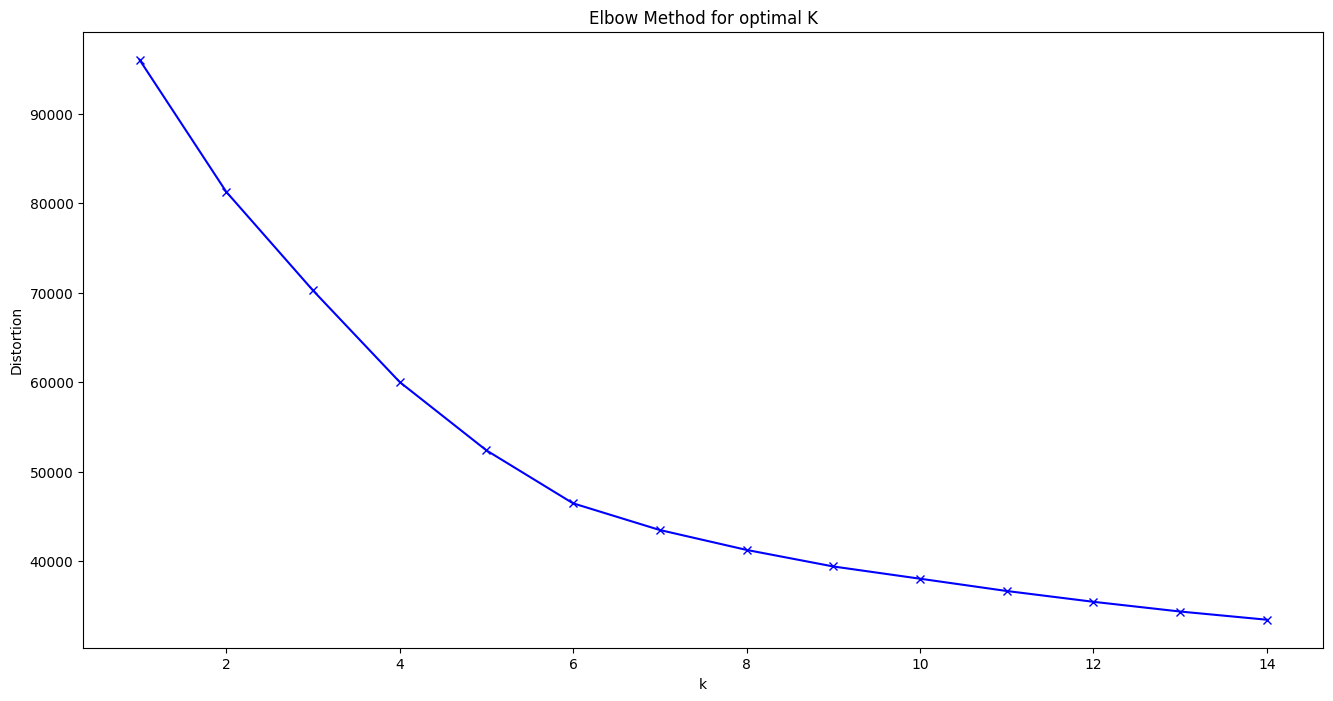

In [6]:
plot_elbow(X,start=1,end=15)

## Observation:

Elbow seems to be at k=6.

In [7]:
true_k = 6
km = KMeans(n_clusters=true_k)
km.fit(X)

KMeans(n_clusters=6)

In [8]:
labels = km.labels_
songs_cl2 = pd.DataFrame(list(zip(en_songs2.track_name, labels)), columns=['title','cluster'])
songs_cl2.cluster.value_counts()

4    4568
0    2914
1    1994
2    1833
3    1733
5     681
Name: cluster, dtype: int64

In [9]:
songs_cl2

,title,cluster
0,I Feel Alive,0
1,Poison,2
2,Baby It's Cold Outside (feat. Christina Aguilera),3
3,Dumb Litty,4
4,Soldier,0
...,...,...
13718,Sick Feeling,0
13719,Some Way,2
13720,Rising Like The Sun - Radio Mix,0
13721,Bound,3


In [10]:
en_songs2['cluster_label'] = songs_cl2['cluster']

In [11]:
en_songs3 = en_songs2.copy()

In [12]:
en_songs3.to_csv('data/en_songs3.csv', index=False)